In [52]:
import os
import numpy as np
from metavision_sdk_core import BaseFrameGenerationAlgorithm
from metavision_core.event_io import EventsIterator
import metavision_sdk_cv
import cv2

from ipywidgets import interact 
from PIL import Image

In [71]:
from metavision_core.utils import get_sample

sequence_filename = r"C:\Users\alifb\OneDrive\Documents\evk_samples\data\direct_100ms_roi.raw"

# get_sample(sequence_filename, folder=".")
# assert(os.path.isfile(sequence_filename))

In [82]:
mv_it = EventsIterator(sequence_filename)
height, width = mv_it.get_size()

frequency_filter = metavision_sdk_cv.FrequencyAlgorithm(width=width, height=height, min_freq=5, max_freq=2000)
frequency_clustering_filter = metavision_sdk_cv.FrequencyClusteringAlgorithm(width=width, height=height,
                                                                             min_cluster_size=5, max_time_diff=10000)

freq_buffer = frequency_filter.get_empty_output_buffer()
cluster_buffer = frequency_clustering_filter.get_empty_output_buffer()


im = np.zeros((height, width, 3), dtype=np.uint8)

for idx, ev in enumerate(mv_it):

    # if idx >= 10000:
    #     break

    BaseFrameGenerationAlgorithm.generate_frame(ev, im)

    frequency_filter.process_events(ev, freq_buffer)
    frequency_clustering_filter.process_events(freq_buffer, cluster_buffer)
    if cluster_buffer.numpy().shape[0] > 0:
        print(cluster_buffer.numpy())
    for cluster in cluster_buffer.numpy():
        x0 = int(cluster["x"]) - 10
        y0 = int(cluster["y"]) - 10
        cv2.rectangle(im, (x0, y0), (x0+20, y0+20), color=(0, 255, 0))
        cv2.putText(im, "id_{}: {} Hz".format(cluster["id"], int(cluster["frequency"])), (x0, y0-10), cv2.FONT_HERSHEY_PLAIN,
                    1, (0, 255, 0), 1)

    cv2.imshow("Events", im[...,::-1])
    cv2.waitKey(0)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

[(691.91, 249.09998, 870393, 4.992858, 24, 5, 3)]
[(664.25464, 246.70189, 1070719, 4.996509, 140, 6, 6)]
[(687.99005, 245.62897, 1270839, 4.9959316, 253, 6, 4)]
[(693.9899, 249.0719, 1471096, 4.9959745, 380, 6, 5)]
[(659.6944, 250.12138, 1671599, 4.995494, 485, 13, 9)]
[(680.41486, 239.98999, 1871499, 4.995734, 601, 6, 5)]
[(636.7909, 320.00897, 2472356, 4.9958644, 921, 6, 4)]
[(647.64606, 270.9019 , 2872383, 4.994477 , 1168, 5, 5)
 (661.071  , 248.00998, 2872886, 4.9969473, 1192, 6, 4)
 (655.80994, 256.91   , 2872763, 4.9970126, 1200, 5, 3)]
[(697.18994, 256.351, 3072643, 4.995356, 1309, 5, 4)]
[(695.1, 325.16098, 3272600, 4.9947643, 1402, 6, 4)]
[(670.98096, 241.00899, 3472835, 4.9959755, 1526, 7, 4)]
[(652.53894, 261.261, 3873479, 4.9973464, 1757, 6, 4)]
[(674.99097, 240.271, 4073435, 4.995514, 1871, 5, 4)]
[(697.371, 258.00998, 4273971, 4.993882, 1992, 5, 4)]
[(685.908, 243.52899, 4473932, 4.9946012, 2113, 6, 5)]
[(698.009, 257.71   , 4674051, 4.9949064, 2207, 6, 4)
 (658.919, 251.

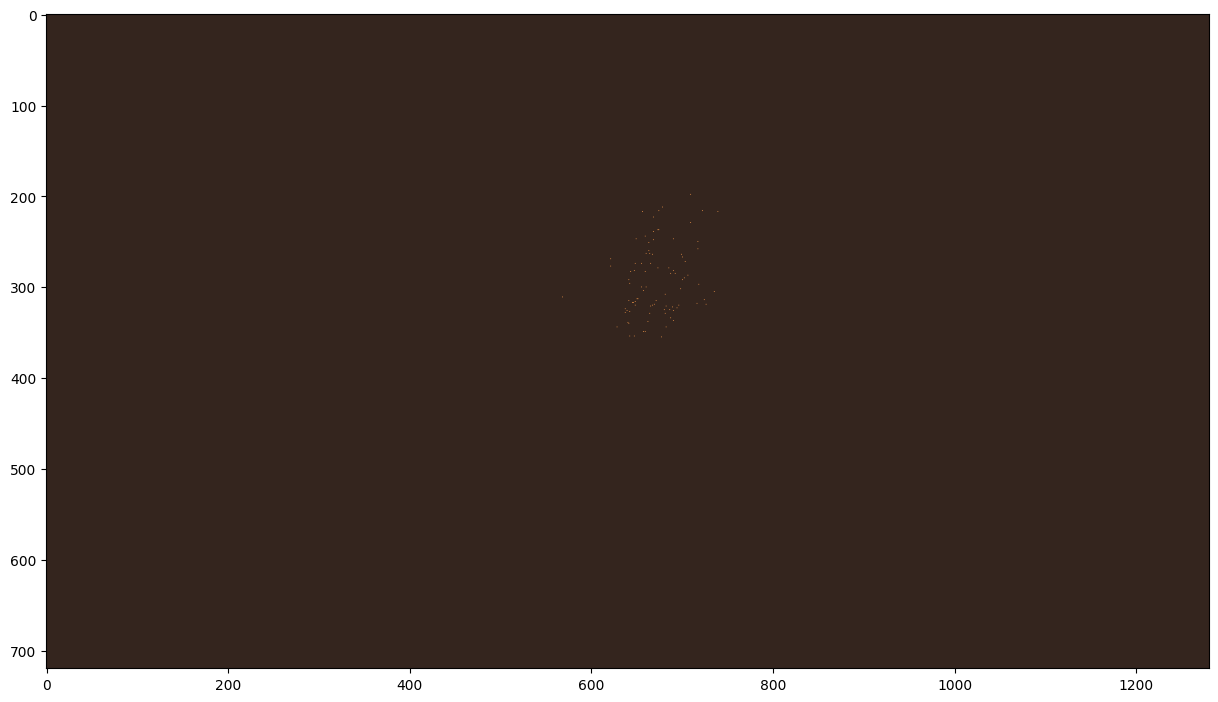

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,15))
plt.imshow(im, aspect="equal")